<a href="https://colab.research.google.com/github/JouhainaB/SalesPredictions/blob/main/sales_predictions3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales_predictions_2023.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
df.shape

(8523, 12)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [17]:
df.duplicated().sum()

0

In [18]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:

df['Item_Weight'].fillna(0,inplace=True)
df['Outlet_Size'].fillna('Missing',inplace=True)


In [20]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [22]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('LF','low fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg','regular')
df['Item_Fat_Content']=df['Item_Fat_Content'].str.lower()
df['Item_Fat_Content'].value_counts()

low fat    5517
regular    3006
Name: Item_Fat_Content, dtype: int64

In [23]:
max_mrp=df['Item_MRP'].max()
min_mrp=df['Item_MRP'].min()
mean_mrp=df['Item_MRP'].mean()
print(f'Maximum Item MRP: {max_mrp}')
print(f'Minimum Item MRP: {min_mrp}')
print(f'Average Item MRP: {mean_mrp}')

Maximum Item MRP: 266.8884
Minimum Item MRP: 31.29
Average Item MRP: 140.9927819781767


In [24]:
max_Weight=df['Item_Weight'].max()
min_Weight=df['Item_Weight'].min()
mean_Weight=df['Item_Weight'].mean()
print(f'Maximum Item Weight: {max_Weight}')
print(f'Minimum Item Weight: {min_Weight}')
print(f'Average Item Weight: {mean_Weight}')

Maximum Item Weight: 21.35
Minimum Item Weight: 0.0
Average Item Weight: 10.650589581133403


In [25]:
max_Outlet_Sales=df['Item_Outlet_Sales'].max()
min_Outlet_Sales=df['Item_Outlet_Sales'].min()
mean_Outlet_Sales=df['Item_Outlet_Sales'].mean()
print(f'Maximum Item Outlet_Sales: {max_Outlet_Sales}')
print(f'Minimum Item Outlet_Sales: {min_Outlet_Sales}')
print(f'Average Item Outlet_Sales: {mean_Outlet_Sales}')

Maximum Item Outlet_Sales: 13086.9648
Minimum Item Outlet_Sales: 33.29
Average Item Outlet_Sales: 2181.288913575032


In [27]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

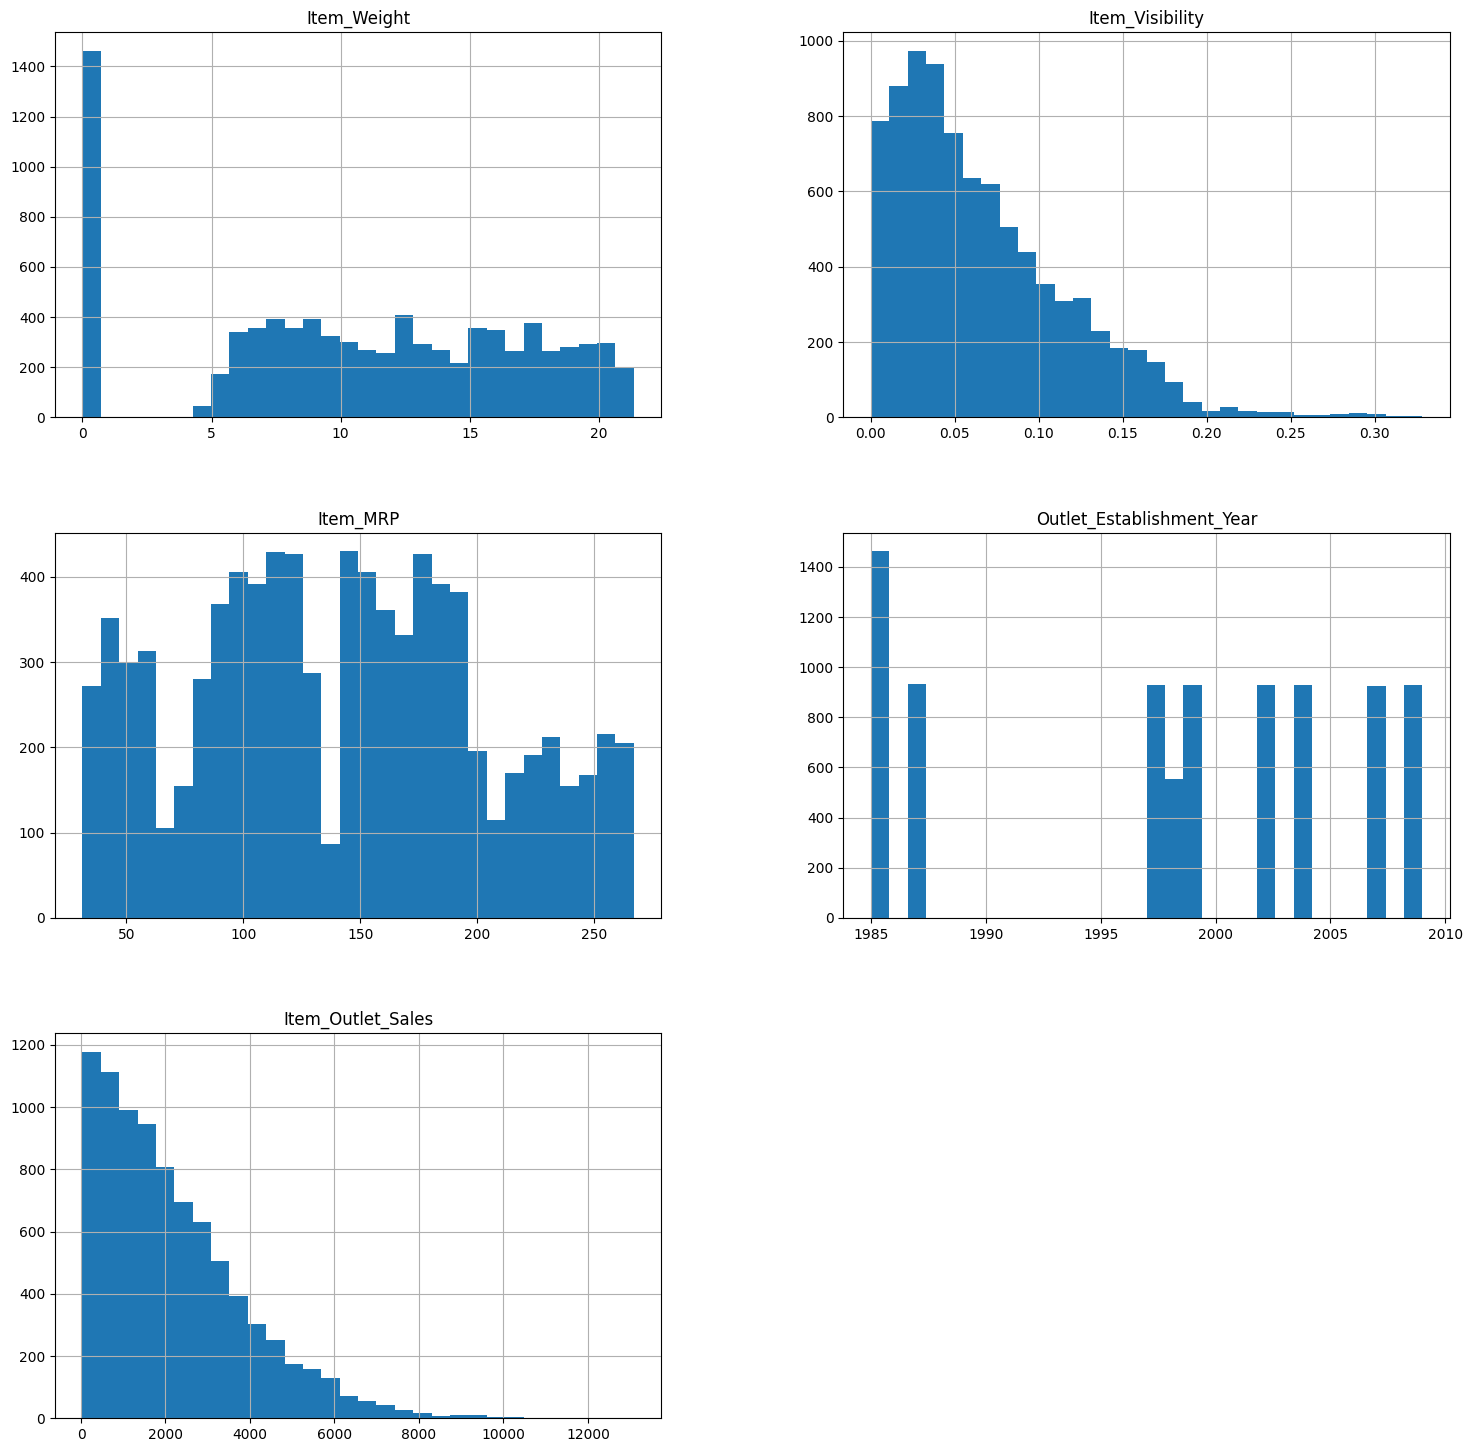

In [26]:
df.hist(figsize=(18,18),bins=30)
plt.show()

In [54]:
df['Item_Fat_Content'].value_counts()
df_fat=pd.DataFrame(df['Item_Fat_Content'].value_counts())
df_fat

,Item_Fat_Content
low fat,5517
regular,3006


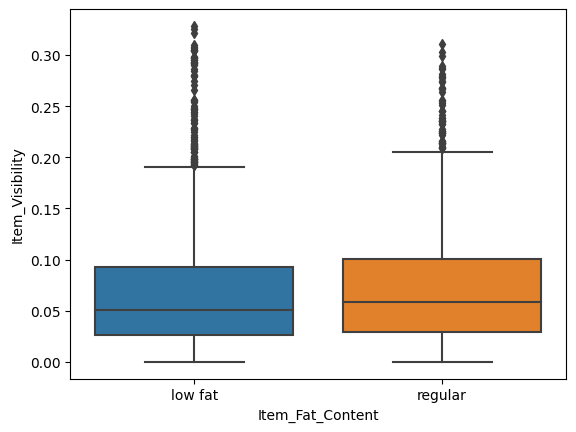

In [50]:
sns.boxplot(x='Item_Fat_Content',y='Item_Visibility',data=df)
plt.show()

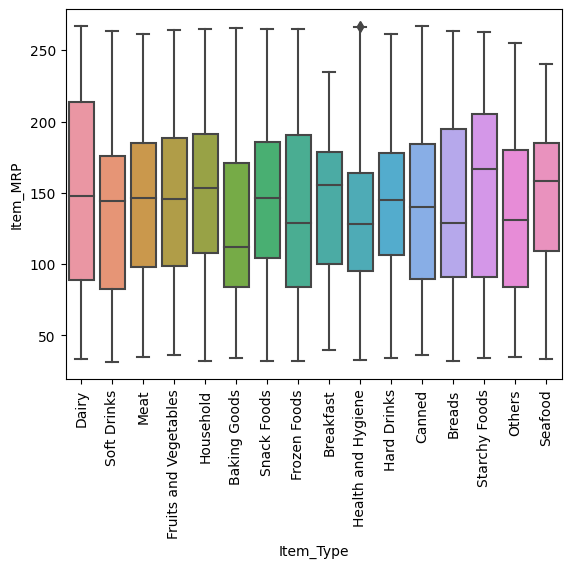

In [52]:
sns.boxplot(x='Item_Type',y='Item_MRP',data=df)
plt.xticks(rotation=90)
plt.show()

<ipython-input-35-2eadb771e2e5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=df.corr()


<Axes: >

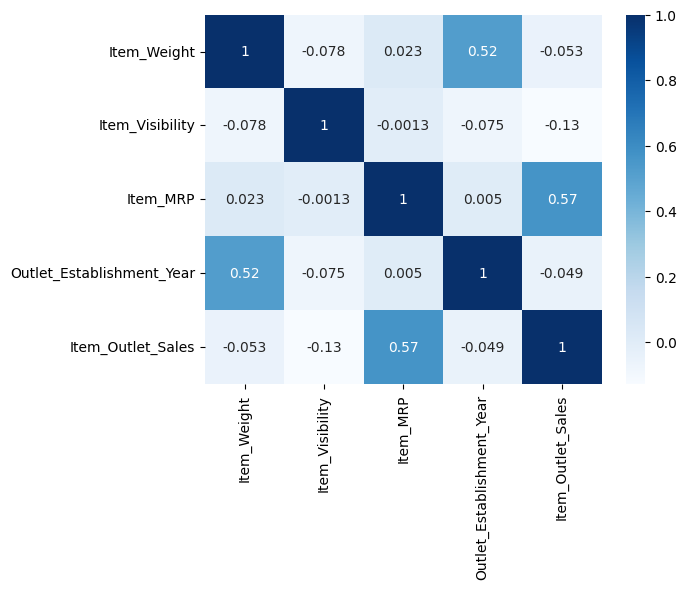

In [35]:
df_corr=df.corr()
sns.heatmap(df_corr,cmap='Blues',annot=True)